# Staff-Graded Homework 11

For all plots for this question, it is not necessary to include axis labels. Include a legend where the values plotted are non-binary. Always include a title. Additionally, for all "heatmap" style plots for this question, use darker colors to indicate higher densities or node connections, and lighter colors to indicate sparsity or nodes not being connected.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [4]:
pi = np.array([0.5, 0.15, 0.35])
rho = 1
B = np.array([[0.9, 0.15, 0.25],
              [0.15, 0.75, 0.05],
              [0.25, 0.05, 0.6]])

## a.
For $n = 200$, generate an instance of the binary community membership $\Theta$ matrix by sampling from a multinomial with probability parameter $\pi$. What is the expected number of members for each community? For your instance of $\Theta$, what is your observed number of members for each community? Create a visualization of your $\Theta$ matrix that matches the style shown in the "LECTURE 28: Blockmodels and Spectral Clustering" video (Slide 6). (Consider using the heatmap function from either the seaborn or the graspologic.plot package.)

Community 1 member count:           
- Expected = 100, Observed = 93
Community 2 member count:           
- Expected = 30, Observed = 36
Community 3 member count:           
- Expected = 70, Observed = 71


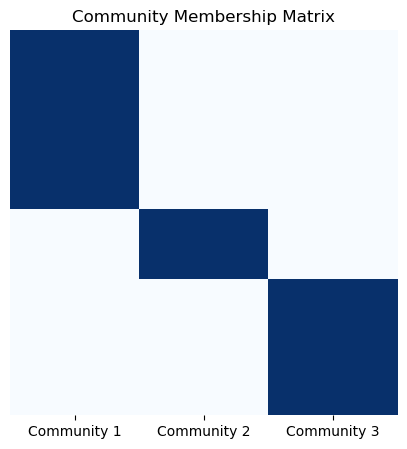

In [6]:
n = 200
K = len(pi)
z = np.random.choice(K, size = n, p = pi)
z = np.sort(z)

# Theta matrix
Z = np.zeros([n, K])  # Theta
Z[range(n), z] = 1
communities, counts = np.unique(z, return_counts=True)

# Expected and observed counts
for i in range(K):
    expected = pi[i] * n
    observed = counts[i]
    print(f"Community {i+1} member count: \
          \n- Expected = {int(expected)}, Observed = {int(observed)}")

# Plot
plt.figure(figsize = (5, 5))
sns.heatmap(Z, cmap = "Blues", cbar = False)
plt.xticks(ticks = [0.5, 1.5, 2.5], 
           labels = ["Community 1", "Community 2", "Community 3"])
plt.yticks([])
plt.title("Community Membership Matrix");

## b. 
Create the connection probability matrix $P$. Create a visualization of your $P$ matrix that matches the style shown in the "LECTURE 28: Blockmodels and Spectral Clustering" video (Slide 6). Show this plot side-by-side with your visualization of $\Theta$ (Hint: Consider using the subplot function of the matplotlib.pyplot package). Additionally, report the values of $P[1, 3], P[197, 199],$ and $P[192, 4]$. 

P[1, 3] = 0.9
P[197, 199] = 0.6
P[192, 4] = 0.25


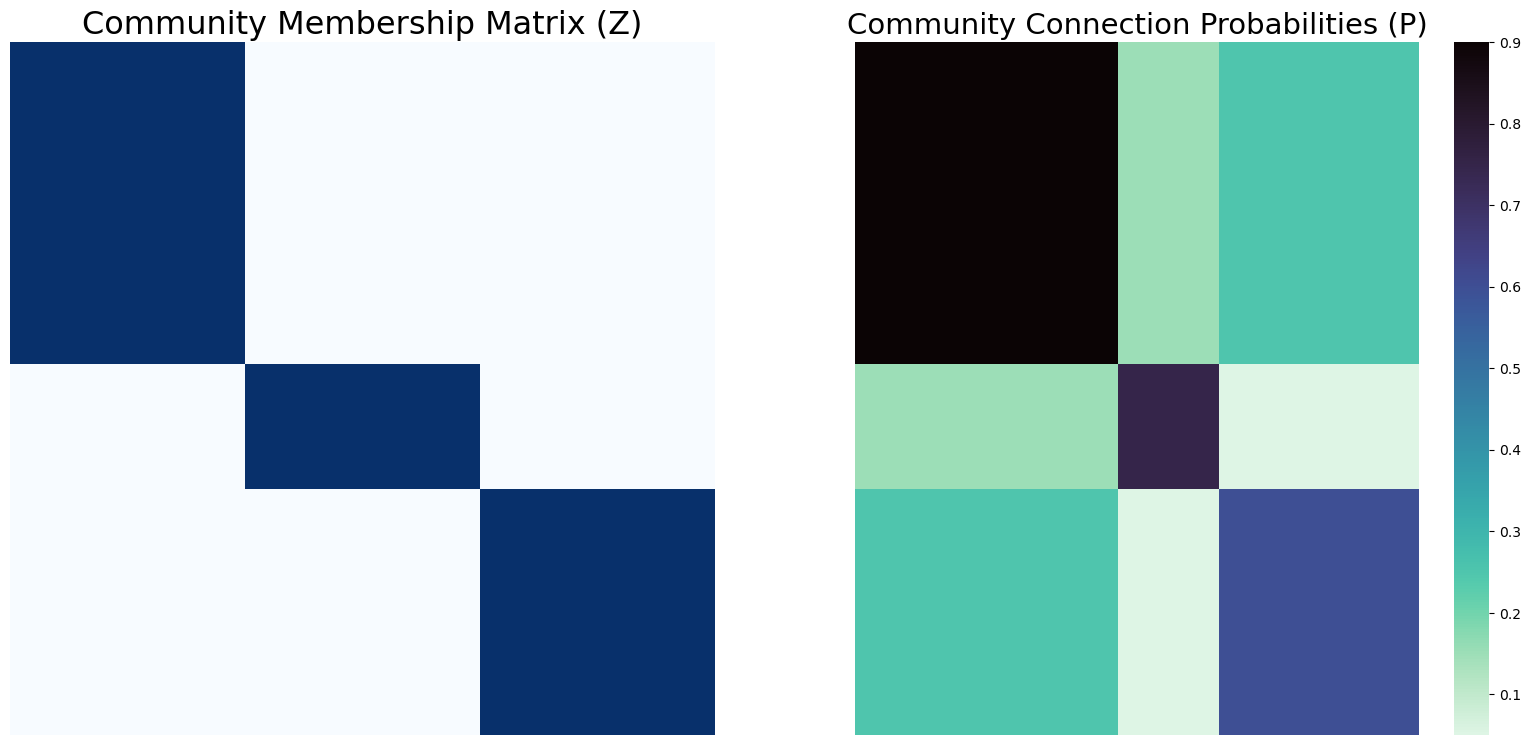

In [8]:
# Connection probability matrix
P = Z.dot(B).dot(np.transpose(Z))

print(f"P[1, 3] = {P[1, 3]}")
print(f"P[197, 199] = {P[197, 199]}")
print(f"P[192, 4] = {P[192, 4]}")

# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 9))

sns.heatmap(Z, cmap = "Blues", ax = ax[0], cbar = False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Community Membership Matrix (Z)", fontsize = 23);

sns.heatmap(P, cmap = "mako_r", ax = ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Community Connection Probabilities (P)", fontsize = 21);

## c.
Create a random instance of your network adjacency matrix $A$, where $A$ represents an undirected graph where a node is not a neighbor of itself. Create a visualization of your $A$ matrix that matches the style shown in the "LECTURE 28: Blockmodels and Spectral Clustering" video (Slide 6). Show this plot side-by-side with your visualization of $P$.

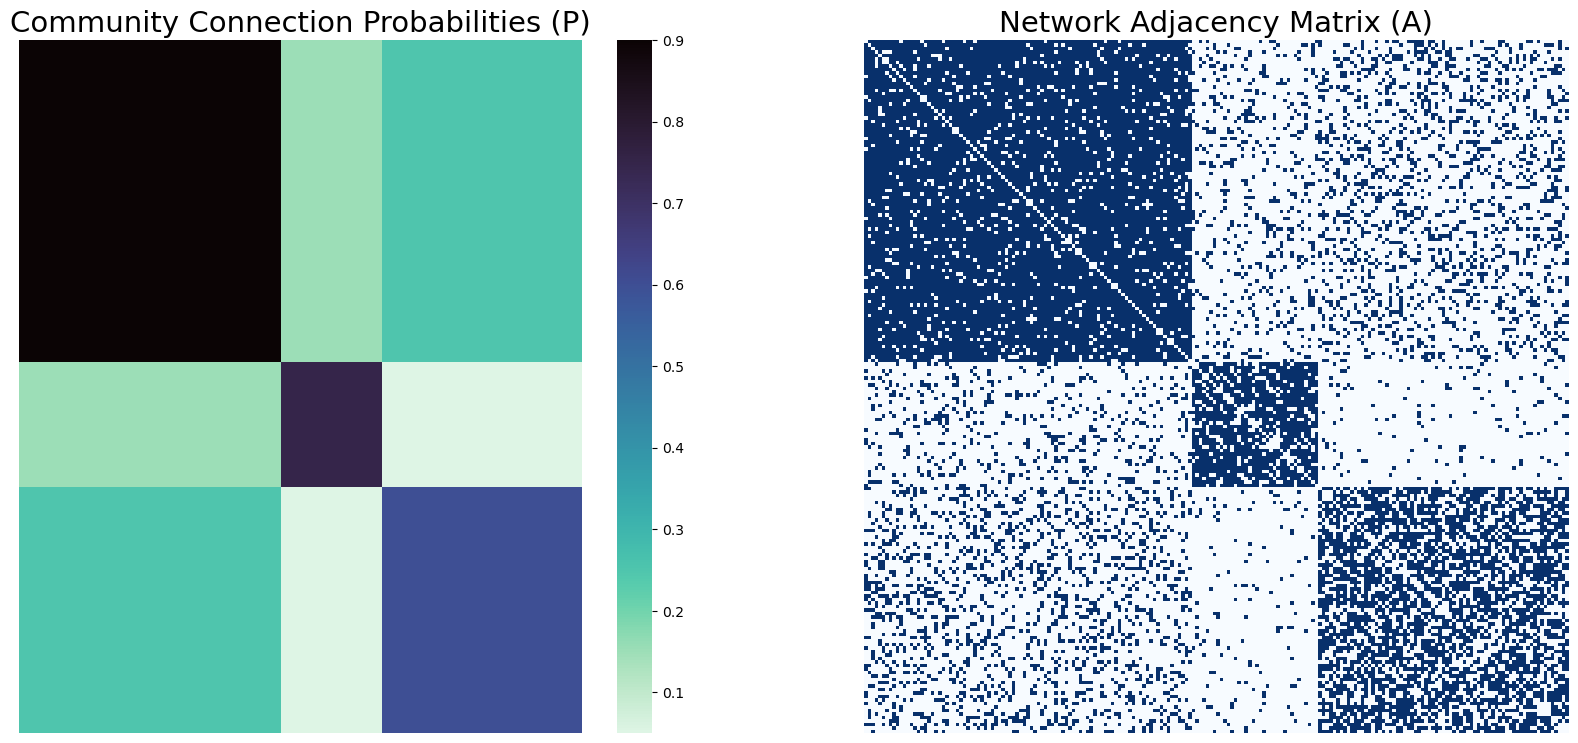

In [10]:
# Random instance of network adjacency matrix
R = np.random.uniform(size = [n,n])
R1 = np.triu(R) + np.transpose(np.triu(R))
A = 1 * (R1 < P)
A = A - np.diag(np.diag(A))  

# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 9))

sns.heatmap(P, cmap = "mako_r", ax = ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Community Connection Probabilities (P)", fontsize = 21);

sns.heatmap(A, cmap = "Blues", ax = ax[1], cbar = False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Network Adjacency Matrix (A)", fontsize = 21);

## d.
Create a network plot representing your network adjacency matrix. Color each node according to their community assignment. (Hint: Consider using the from_numpy_matrix and draw (or draw_networkx) functions from the networkx package. Additionally, to see how densely/sparsely connected the network is, consider modifying the node_size and width arguments to be small.) Report your plot. How do the connection densities of the different communities compare within each community? How do the connection densities of the different communities compare across communities? Discuss the highest and lowest connection densities when you answer these questions.

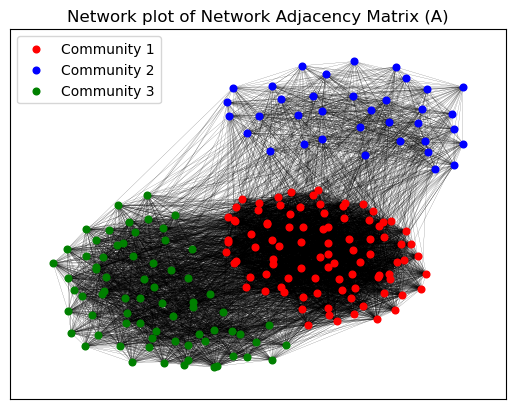

In [12]:
network_obj = nx.from_numpy_array(A)

community_1 = np.where(z == 0)[0]
community_2 = np.where(z == 1)[0]
community_3 = np.where(z == 2)[0]

pos = nx.spring_layout(network_obj)
nx.draw_networkx_nodes(network_obj, pos=pos, node_size = 23,
                       nodelist = community_1, 
                       node_color = "red", label = "Community 1")
nx.draw_networkx_nodes(network_obj, pos=pos, node_size = 23, 
                       nodelist = community_2, 
                       node_color = "blue", label = "Community 2")
nx.draw_networkx_nodes(network_obj, pos=pos, node_size = 23, 
                       nodelist = community_3, 
                       node_color = "green", label="Community 3")
nx.draw_networkx_edges(network_obj, pos=pos, width = 0.1)
plt.legend()
plt.title("Network plot of Network Adjacency Matrix (A)");

From the network visualization above, it seems the highest connection density within a community is in community 1, while the lowest connection desity is community 2. We can see by how heavily the edges are connected within each group of nodes.  
As for connection densities across communities, we can see that communities 1 and 3 have the highest connection density, shown by the great number of edges connecting the red and green groups of nodes, while it seems that community 2 has a low connection density with respect to the other two communities, and least being between communities 2 and 3. 